In [1]:
import tensorflow as tf

In [2]:
# 1920 * 1080

IMG_WIDTH = 256 # 512
IMG_HEIGHT = 256 # 288
IMG_CHANNELS = 3
NUM_CATEGORIES = 10

In [3]:
inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))


# contraction path
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)


c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)


c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)


c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)


c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)


# Expanisve path
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)


u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)


u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)


u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1])
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)


outputs = tf.keras.layers.Conv2D( NUM_CATEGORIES, (1, 1), activation='sigmoid')(c9)  

In [4]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 256, 256, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['lambda[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                             

In [5]:
# def resize(input_image, input_mask):
#    input_image = tf.image.resize(input_image, (128, 128), method="nearest")
#    input_mask = tf.image.resize(input_mask, (128, 128), method="nearest")
#    return input_image, input_mask


# def augment(input_image, input_mask):
#    if tf.random.uniform(()) > 0.5:
#        # Random flipping of the image and mask
#        input_image = tf.image.flip_left_right(input_image)
#        input_mask = tf.image.flip_left_right(input_mask)
#    return input_image, input_mask




import os

input_dir = "..\AutoLaparo_Task3\imgs\imgs"
target_dir = "..\AutoLaparo_Task3\masks\masks"
img_size = (256, 256)
num_classes = 10
batch_size = 32

path = os.getcwd()

input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)

target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

Number of samples: 1800
..\AutoLaparo_Task3\imgs\imgs\001001.jpg | ..\AutoLaparo_Task3\masks\masks\001001.png
..\AutoLaparo_Task3\imgs\imgs\001025.jpg | ..\AutoLaparo_Task3\masks\masks\001025.png
..\AutoLaparo_Task3\imgs\imgs\001050.jpg | ..\AutoLaparo_Task3\masks\masks\001050.png
..\AutoLaparo_Task3\imgs\imgs\001075.jpg | ..\AutoLaparo_Task3\masks\masks\001075.png
..\AutoLaparo_Task3\imgs\imgs\001100.jpg | ..\AutoLaparo_Task3\masks\masks\001100.png
..\AutoLaparo_Task3\imgs\imgs\001125.jpg | ..\AutoLaparo_Task3\masks\masks\001125.png
..\AutoLaparo_Task3\imgs\imgs\002001.jpg | ..\AutoLaparo_Task3\masks\masks\002001.png
..\AutoLaparo_Task3\imgs\imgs\002025.jpg | ..\AutoLaparo_Task3\masks\masks\002025.png
..\AutoLaparo_Task3\imgs\imgs\002050.jpg | ..\AutoLaparo_Task3\masks\masks\002050.png
..\AutoLaparo_Task3\imgs\imgs\002075.jpg | ..\AutoLaparo_Task3\masks\masks\002075.png


In [6]:
# import cv2
# import numpy as np
# import random
# import matplotlib.pyplot as plt
# from PIL import Image

# # loading image data...
# def data_loader(paths):
#     # folder_dir = "../data/semantic_drone_dataset/training_set/images/"
#     image_dataset = []
#     for images in paths:
#         image = cv2.imread(images)
#         image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#         image = cv2.resize(image, (256, 256))
#         image = Image.fromarray(image)
#         image = np.array(image)
#         image_dataset.append(image)
#     return image_dataset


# new_image_dataset = data_loader(input_img_paths)
# new_target_dataset = data_loader(target_img_paths)

# new_image_dataset = np.array(new_image_dataset)
# new_target_dataset = np.array(new_target_dataset)

# print(new_target_dataset.shape)


In [7]:
# image_number = 560

# plt.figure(figsize=(12, 6))
# plt.subplot(121)
# plt.imshow(new_image_dataset[image_number])
# plt.subplot(122)
# plt.imshow(new_target_dataset[image_number])
# plt.show()

In [8]:
# colors = {'background': (0,0,0),
#                'tool1m': (20,20,20),
#                'tool1s': (40,40,40),
#                'tool2m': (60,60,60),
#                'tool2s': (80,80,80),
#                'tool3m': (100,100,100),
#                'tool3s': (120,120,120),
#                'tool4m': (140,140,140),
#                'tool4s': (160,160,160),
#                'uterus': (180,180,180),
#                }
# def rgb_to_labels(img, mask_labels):
#     label_seg = np.zeros(img.shape,dtype=np.uint8)
#     for label, rgb in colors.items():  # Iterate over each label and its corresponding RGB color
#         for i in range(img.shape[0]):  # Iterate over each row in mask_labels
#             if np.all(img[mask_labels == rgb] == rgb, axis=-1).any():  # Check if RGB color matches any pixel in the image
#                 label_seg[mask_labels == rgb] = i  # Assign the label to pixels matching the RGB color
#     return label_seg

In [9]:
# labels = []
# for i in range(new_target_dataset.shape[0]):
#     label = rgb_to_labels(new_target_dataset[i], colors) # calling rgb to labels for each images...
#     labels.append(label)

In [10]:
# labels = np.array(labels)
# # labels = np.expand_dims(labels, axis=3)

# print("Unique labels in label dataset are: ", np.unique(labels))

# #Another Sanity check...
# image_number = random.randint(0, len(new_image_dataset))
# plt.figure(figsize=(12, 6))
# plt.subplot(121)
# plt.imshow(new_image_dataset[image_number])
# plt.subplot(122)
# plt.imshow(labels[image_number][:,:,0])
# plt.show()

In [11]:
# def new_load_img_masks(input_img_path, target_img_path):
#     input_img = tf.io.read_file(input_img_path)
#     input_img = tf.io.decode_png(input_img, channels=3)
#     input_img = tf.image.resize(input_img, img_size)
#     input_img = tf.image.convert_image_dtype(input_img, "float32")

#     target_img = tf.io.read_file(target_img_path)
#     target_img = tf.io.decode_png(target_img, channels=3)
#     target_img = tf.image.resize(target_img, img_size, method="nearest")
#     target_img = tf.image.convert_image_dtype(target_img, "uint8")

#     # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
#     target_img = target_img // 20
#     return input_img, target_img

# new_input_data , new_output_data = new_load_img_masks(input_img_paths[14], target_img_paths[14])
# # new_output_data = new_output_data[:,:,0]
# print(new_input_data.shape)
# print(new_output_data.shape)

# # new_output_data = np.array(new_output_data)

# # new_output_data = np.expand_dims(new_output_data, axis=3)
# print(new_output_data.shape)

# print("Unique labels in label dataset are: ", np.unique(new_output_data))

# #Another Sanity check...
# # image_number = random.randint(0, len(new_image_dataset))
# plt.figure(figsize=(12, 6))
# plt.subplot(121)
# plt.imshow(new_input_data)
# plt.subplot(122)
# plt.imshow(new_output_data[:,:,0])
# plt.show()



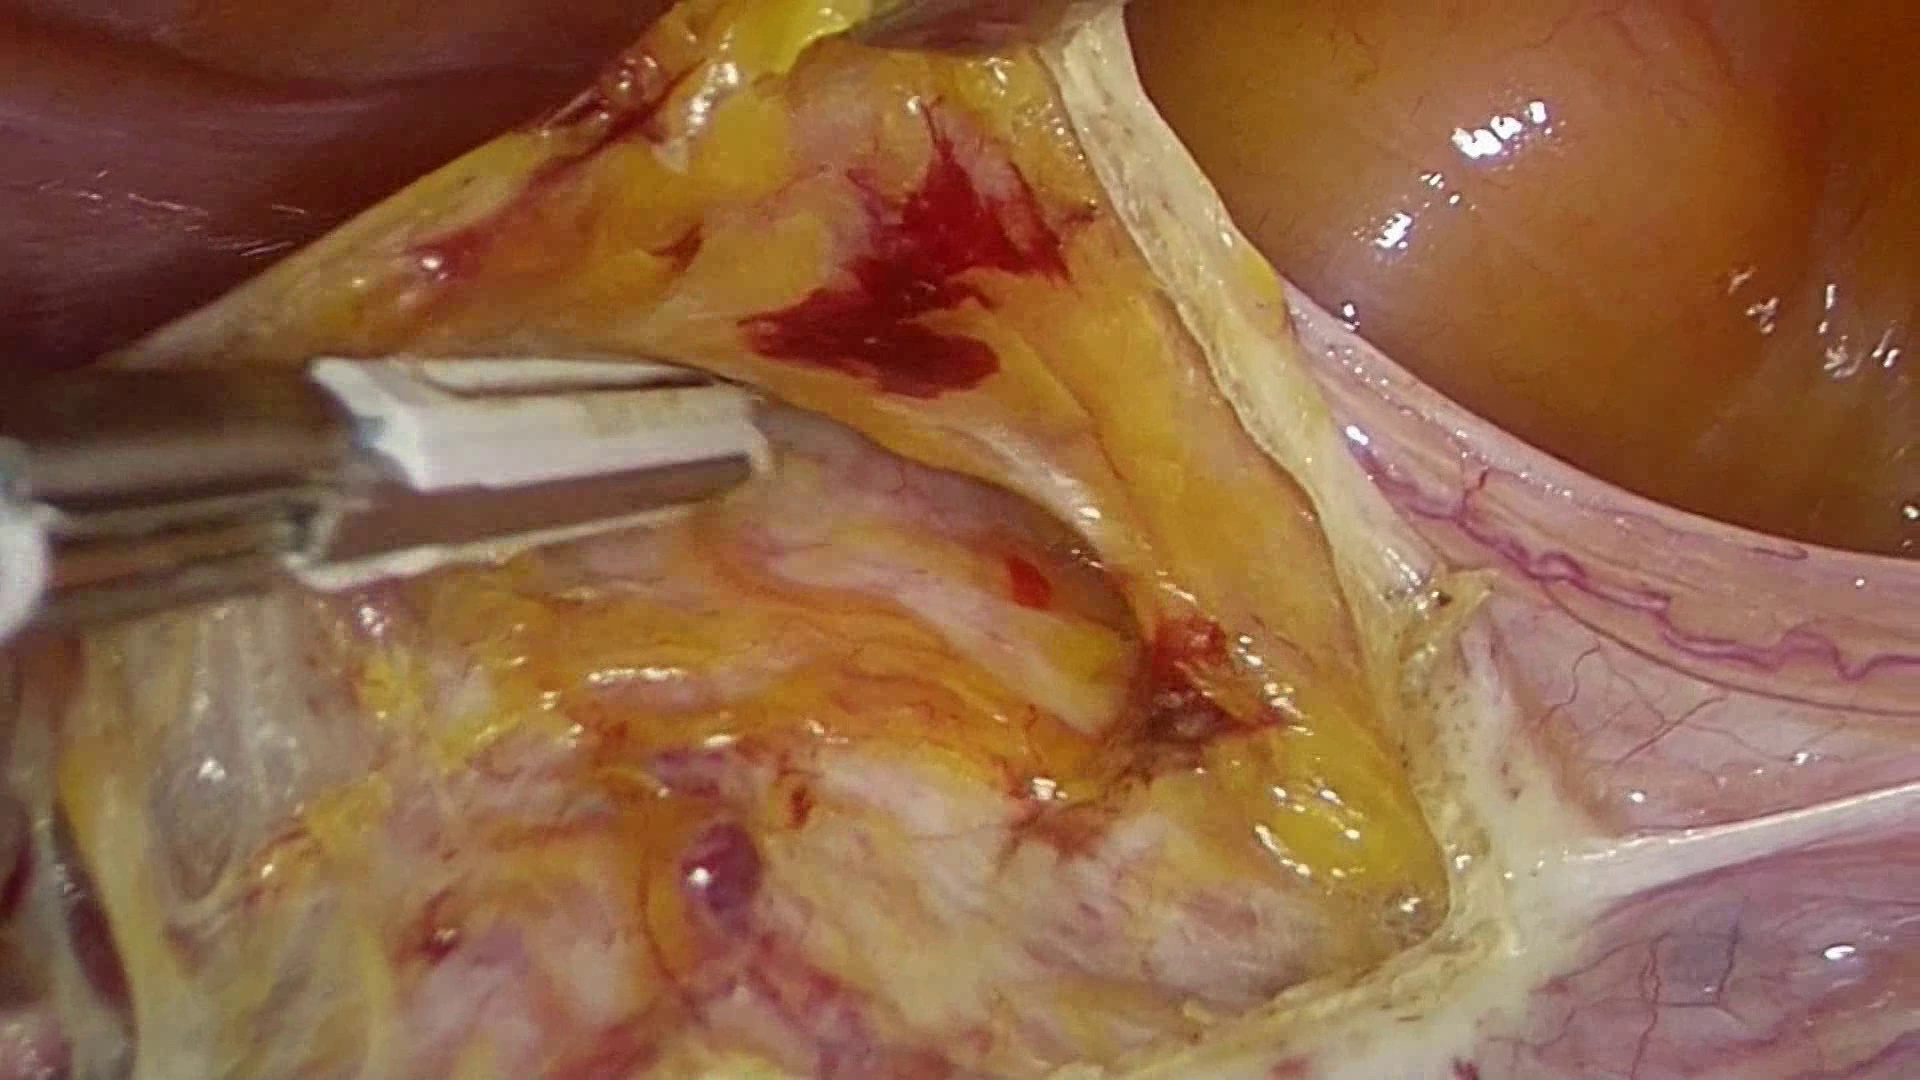

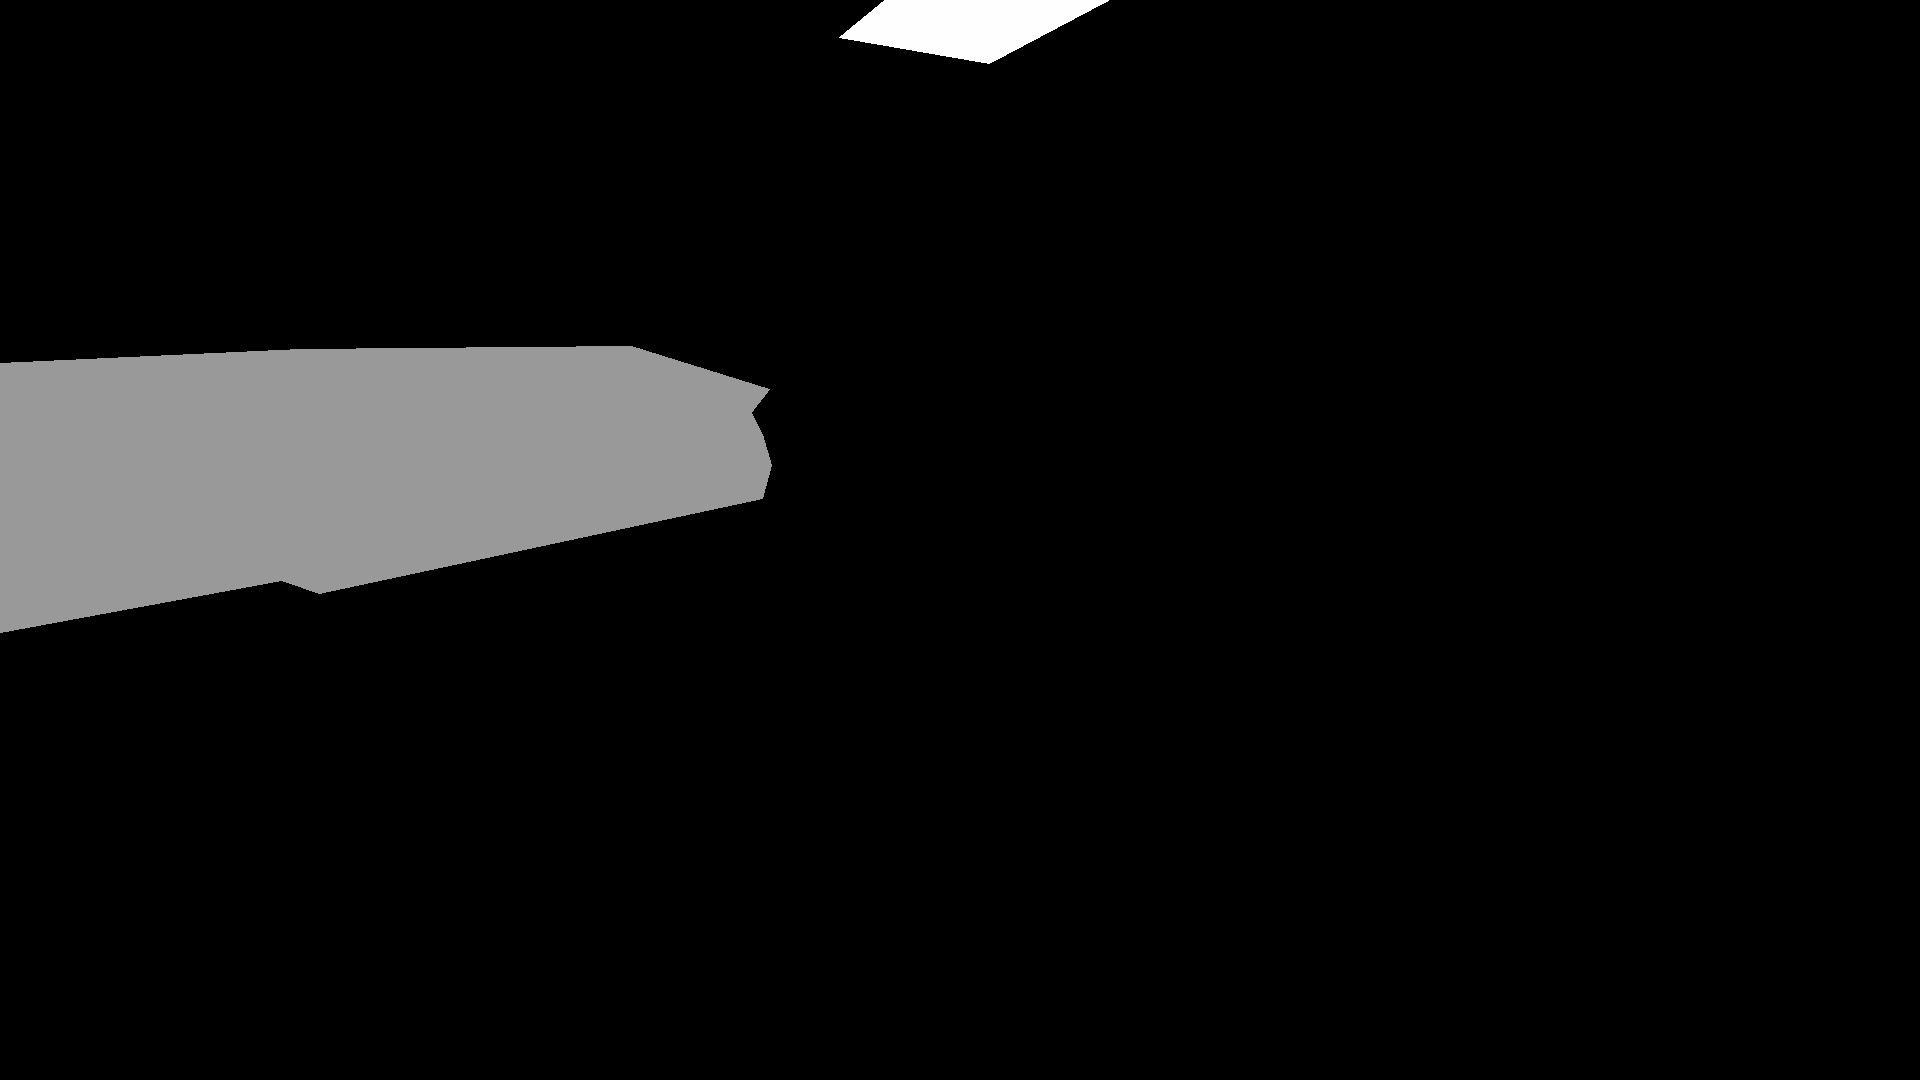

In [12]:
from IPython.display import Image, display
from keras.utils import load_img
from PIL import ImageOps

# Display input image #7
display(Image(filename=input_img_paths[9]))

# Display auto-contrast version of corresponding target (per-pixel categories)
img = ImageOps.autocontrast(load_img(target_img_paths[9]))
display(img)

In [13]:
def get_dataset(
    batch_size,
    img_size,
    input_img_paths,
    target_img_paths,
    max_dataset_len=None,
):
    """Returns a TF Dataset."""

    def load_img_masks(input_img_path, target_img_path):
        input_img = tf.io.read_file(input_img_path)
        input_img = tf.io.decode_png(input_img, channels=3)
        input_img = tf.image.resize(input_img, img_size)
        input_img = tf.image.convert_image_dtype(input_img, "float32")

        target_img = tf.io.read_file(target_img_path)
        target_img = tf.io.decode_png(target_img, channels=1)
        target_img = tf.image.resize(target_img, img_size, method="nearest")
        target_img = tf.image.convert_image_dtype(target_img, "uint8")

        # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
        target_img = target_img // 20
        return input_img, target_img

    # For faster debugging, limit the size of data
    if max_dataset_len:
        input_img_paths = input_img_paths[:max_dataset_len]
        target_img_paths = target_img_paths[:max_dataset_len]
    dataset = tf.data.Dataset.from_tensor_slices((input_img_paths, target_img_paths))
    dataset = dataset.map(load_img_masks, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset.batch(batch_size)

In [14]:
import random

# Split our img paths into a training and a validation set
val_samples = 360
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_img_paths)
train_input_img_paths = input_img_paths[:-val_samples]
train_target_img_paths = target_img_paths[:-val_samples]
val_input_img_paths = input_img_paths[-val_samples:]
val_target_img_paths = target_img_paths[-val_samples:]

# Instantiate dataset for each split
# Limit input files in `max_dataset_len` for faster epoch training time.
# Remove the `max_dataset_len` arg when running with full dataset.
train_dataset = get_dataset(
    batch_size,
    img_size,
    train_input_img_paths,
    train_target_img_paths,
    # max_dataset_len=10,
)
valid_dataset = get_dataset(
    batch_size, img_size, val_input_img_paths, val_target_img_paths
)

[[0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [0.4 0.4 0.4 ... 0.  0.  0. ]
 [0.4 0.4 0.4 ... 0.  0.  0. ]
 [0.4 0.4 0.4 ... 0.  0.  0. ]]
[[0.  0.  0.  ... 0.3 0.3 0.3]
 [0.  0.  0.  ... 0.3 0.3 0.3]
 [0.  0.  0.  ... 0.3 0.3 0.3]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]
[[0.  0.  0.  ... 0.9 0.9 0.9]
 [0.  0.  0.  ... 0.9 0.9 0.9]
 [0.  0.  0.  ... 0.9 0.9 0.9]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]


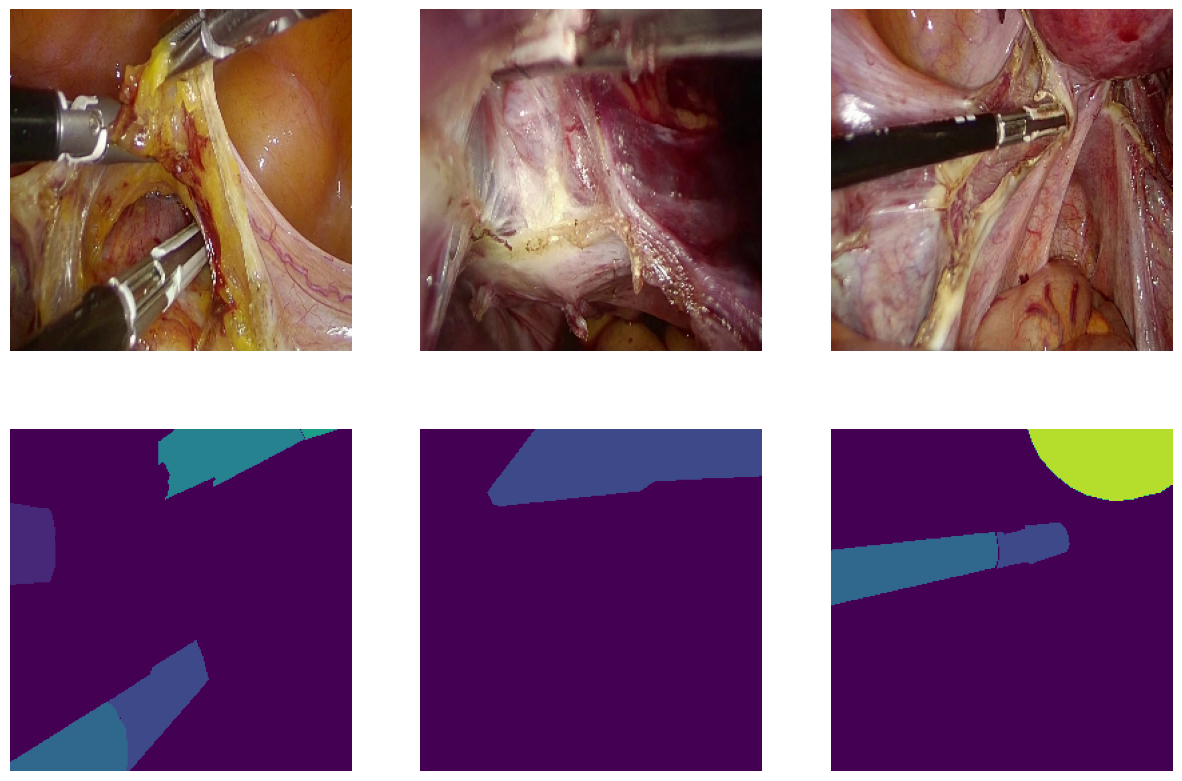

In [28]:
import matplotlib.pyplot as plt
for image, mask in valid_dataset.take(1):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the figsize as needed

    for i in range(3):
        axes[0, i].imshow(image[i].numpy().astype("uint8"))
        axes[0, i].axis("off") 
        axes[1, i].imshow(mask[i].numpy().squeeze(), vmin=1, vmax=10)
        axes[1, i].axis("off")
        print(mask[i].numpy().squeeze())

    plt.show()



Epoch 1/20




45/45 - 307s - loss: 1.2300 - accuracy: 0.6793 - val_loss: 0.8752 - val_accuracy: 0.7964 - 307s/epoch - 7s/step
Epoch 2/20
45/45 - 269s - loss: 0.8271 - accuracy: 0.7916 - val_loss: 0.7225 - val_accuracy: 0.7964 - 269s/epoch - 6s/step
Epoch 3/20
45/45 - 254s - loss: 0.6972 - accuracy: 0.8008 - val_loss: 0.6189 - val_accuracy: 0.8140 - 254s/epoch - 6s/step
Epoch 4/20
45/45 - 259s - loss: 0.6220 - accuracy: 0.8096 - val_loss: 0.5928 - val_accuracy: 0.8171 - 259s/epoch - 6s/step
Epoch 5/20
45/45 - 279s - loss: 0.5785 - accuracy: 0.8165 - val_loss: 0.5497 - val_accuracy: 0.8222 - 279s/epoch - 6s/step
Epoch 6/20
45/45 - 281s - loss: 0.5415 - accuracy: 0.8253 - val_loss: 0.5333 - val_accuracy: 0.8285 - 281s/epoch - 6s/step
Epoch 7/20
45/45 - 280s - loss: 0.5118 - accuracy: 0.8323 - val_loss: 0.5259 - val_accuracy: 0.8281 - 280s/epoch - 6s/step
Epoch 8/20
45/45 - 264s - loss: 0.4831 - accuracy: 0.8382 - val_loss: 0.4940 - val_accuracy: 0.8345 - 264s/epoch - 6s/step
Epoch 9/20
45/45 - 283s -

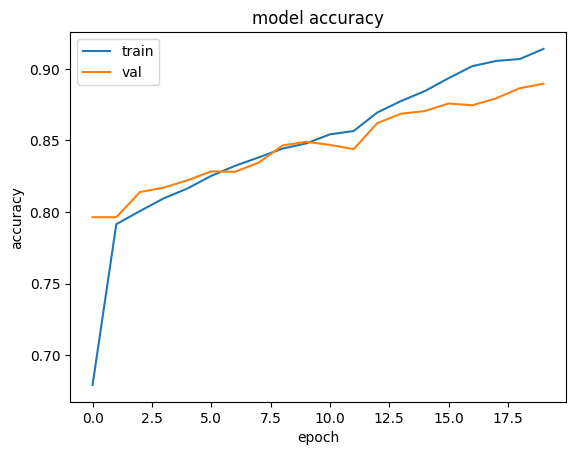

In [16]:
# Configure the model for training.
# We use the "sparse" version of categorical_crossentropy
# because our target data is integers.

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("oxford_segmentation.keras", save_best_only=True)
]

# Train the model, doing validation at the end of each epoch.
epochs = 20
train_mode = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=valid_dataset,
    # callbacks=callbacks,
    verbose=2,
)

plt.plot(train_mode.history['accuracy'])
plt.plot(train_mode.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 [==============================] - 1s 933ms/step


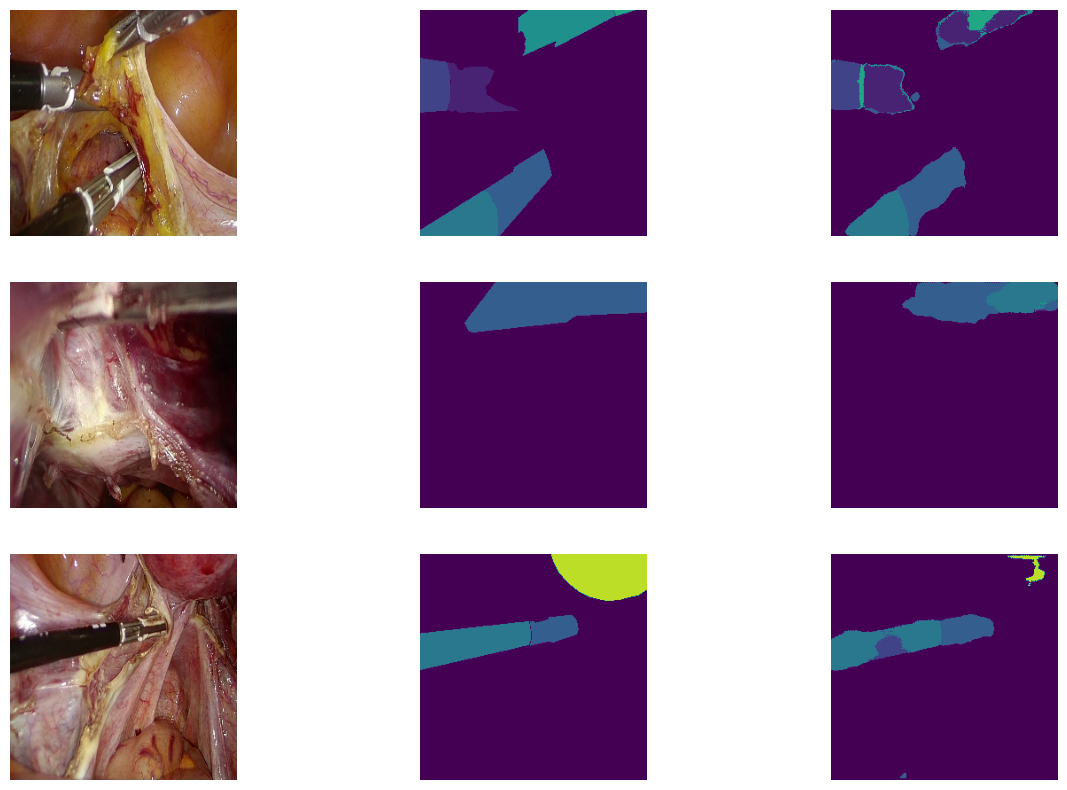

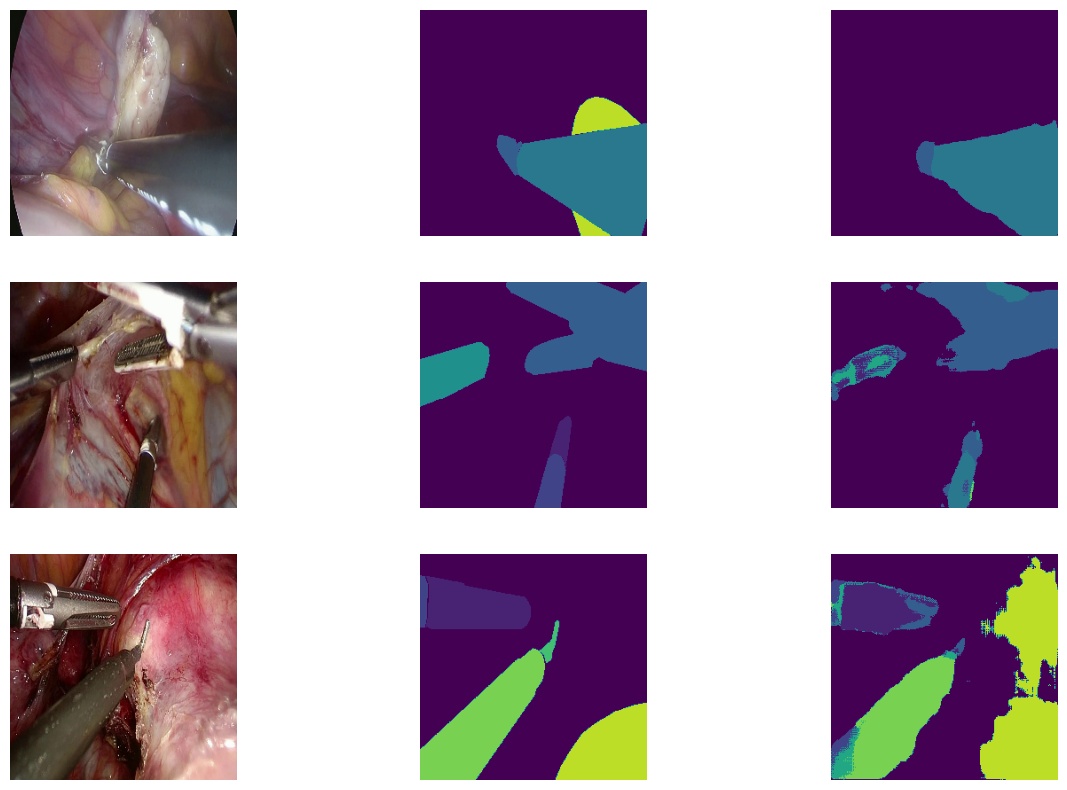

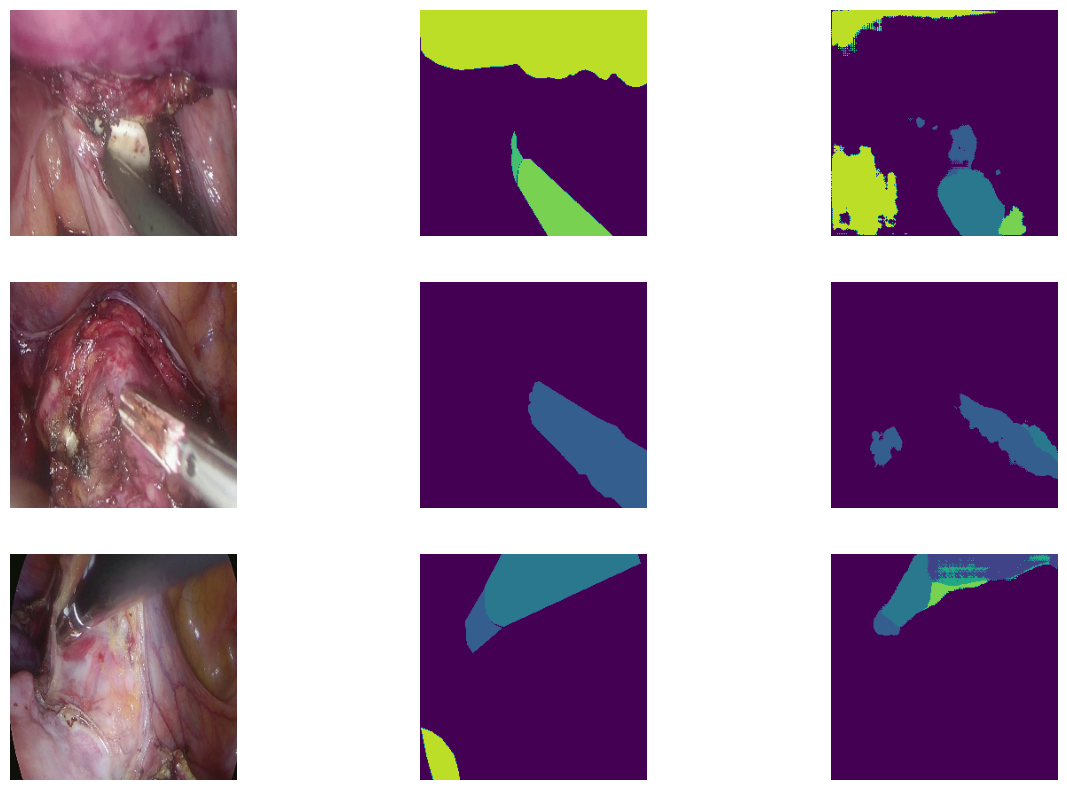

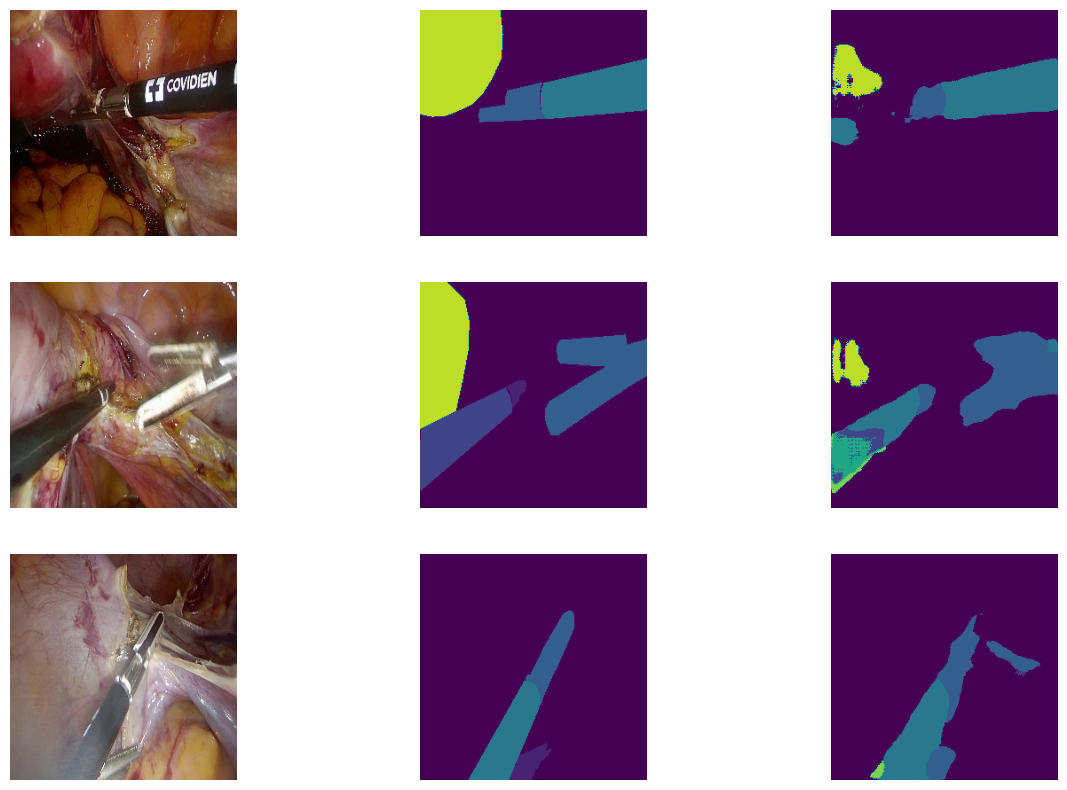

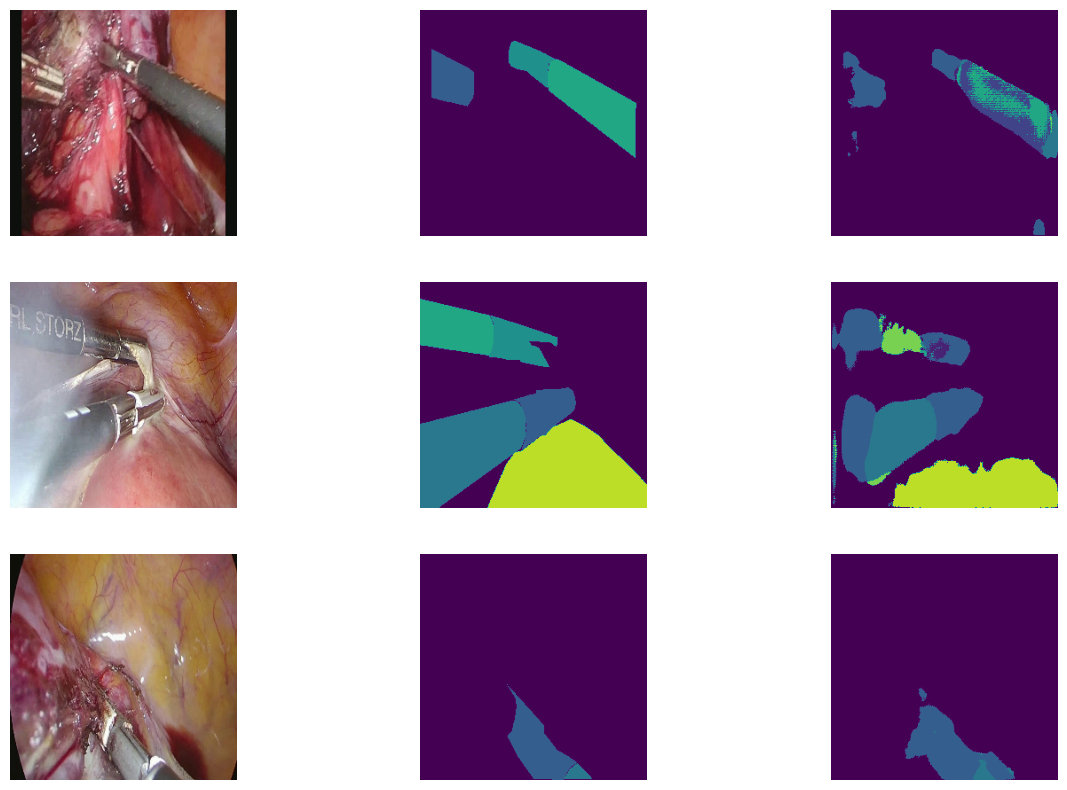

In [40]:
# def display_images(display_list):
#     plt.figure(figsize=(15, 15))
#     title = ["Input Image", "True Mask", "Predicted Mask"]
#     for i in range(len(display_list)):
#         plt.subplot(1, len(display_list), i+1)
#         plt.title(title[i])
#         plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
#         plt.axis("off")
#     plt.show()
import numpy as np

def create_mask(pred_mask, i):
    # multiplied_mask = tf.round(pred_mask * 200)
    # pred_mask = tf.reduce_max(pred_mask, axis=-1, keepdims=True)
    pred_mask = np.argmax(pred_mask[i], axis=-1)
    #pred_mask = np.expand_dims(pred_mask, axis=-1)
    # pred_mask = tf.round(pred_mask)
    # pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask
    pass
def show_predictions(dataset=None, num=1):
    if dataset:
        # for image, mask in dataset.take(num):
        #     pred_mask = model.predict(image)
        #     print(image[0].shape)
        #     print(mask[0])
        #     print(mask[0].shape)
        #     print(pred_mask[0][0])
        #     print(pred_mask[0].shape)
        #     new_pred_mask = tf.reduce_max(pred_mask, axis=-1, keepdims=True)
        #     print(new_pred_mask[0])
        #     print(new_pred_mask[0].shape)
        #     display_images([image[0], mask[0], pred_mask[0]])
        for image, mask in valid_dataset.take(5):
            fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Adjust the figsize as needed

            for i in range(3):
                pred_mask = model.predict(image)
                axes[i, 0].imshow(image[i].numpy().astype("uint8"))
                axes[i, 0].axis("off")
                axes[i, 1].imshow(mask[i], vmin=0, vmax=10)
                axes[i, 1].axis("off")
                axes[i, 2].imshow(create_mask(pred_mask, i), vmin=0, vmax=10)
                axes[i, 2].axis("off")

        # plt.show()
show_predictions(valid_dataset, 10)
